In [34]:
#棄却サンプリング

import numpy as np
import matplotlib.pyplot as plt

#ベータ関数描画用
from scipy.stats import beta

#乱数を固定
np.random.seed(1)

#ベータ分布
a,b = 10.2, 5.8
x = np.linspace(0,1,100)#0から1を100分割
y = beta(a,b).pdf(x)

#棄却サンプリング
N = 100000               #サンプリングする点の数（棄却込み）
samples = np.array([])   #サンプリングした点データ
K = 0.0013               #提案分布が目標分布を覆うようにする

for n in range(N):
    xp = np.random.uniform(0,1) #uniformは乱数生成
    yp = np.random.uniform(0,K)
    pdf = (xp**(a-1)*(1-xp)**(b-1)) #ここは目標分布であるベータ分布
    if (yp<=pdf):
        samples = np.append(samples,xp)

In [35]:
#統計量を比較

#データ
print("サンプリングを試みた回数:",N,"回")
print("サンプリング個数:",len(samples),"個")

サンプリングを試みた回数: 100000 回
サンプリング個数: 2907 個


In [36]:
#事後平均値
mu = np.sum(samples) / len(samples);
print("サンプリング　事後期待値:",mu)
print("真の値　　　　事後期待値:",a/(a+b)) #a/(a+b)はパラメータa,bのベータ分布の期待値

サンプリング　事後期待値: 0.6380349509132323
真の値　　　　事後期待値: 0.6375


In [37]:
#事後分散
v = np.sum((samples-mu)**2)/len(samples);
print("サンプリング　事後分散:",v)
print("真の値　　　　事後分散:",(a+b)/(((a+b)**2)*(a+b+1)))

サンプリング　事後分散: 0.013065766151716899
真の値　　　　事後分散: 0.003676470588235294


In [38]:
#事後標準偏差
print("サンプリング　事後標準偏差:",v**0.5)
print("真の値　　　　事後標準偏差:",((a+b)/(((a+b)**2)*(a+b+1)))**0.5)

サンプリング　事後標準偏差: 0.11430558232963471
真の値　　　　事後標準偏差: 0.06063390625908324


In [39]:
#事後確率最大値
maxIndex = np.argmax((samples**(a-1))*((1-samples)**(b-1)))
print("サンプリング　事後確率最大値:",samples[maxIndex])
print("真の値　　　　事後確率最大値:",(a-1)/(a+b-2))

サンプリング　事後確率最大値: 0.6571520872500076
真の値　　　　事後確率最大値: 0.6571428571428571


In [40]:
#事後中央値
sorted_samples = sorted(samples)
#奇数
if(len(sorted_samples) % 2 != 0):
    midIndex = int((len(sorted_samples)-1)/2)
    midX = sorted_samples[midIndex]
else:
    midIndex = int(len(sorted_samples)/2)
    midX = (sorted_samples[midIndex]+sorted_samples[midIndex-1])/2
print("サンプリング　事後中央値",midX)
print("真の値(np)　 事後中央値",beta(a,b).median())
print("真の値(wiki) 事後中央値",(a-(1/3))/(a+b-(2/3)))

サンプリング　事後中央値 0.6462330810271018
真の値(np)　 事後中央値 0.6433608949743185
真の値(wiki) 事後中央値 0.643478260869565


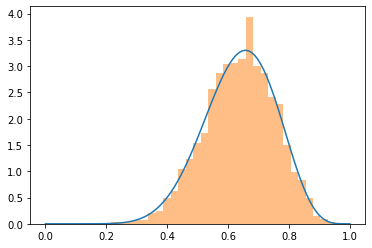

In [41]:
#描画
plt.plot(x,y)
#density=Trueで正規化
plt.hist(samples,bins=30,density=True,alpha=0.5)
plt.show()

In [42]:
samples

array([0.56103022, 0.55971698, 0.75275555, ..., 0.7713486 , 0.56547984,
       0.54913823])

In [43]:
np.size(samples)

2907

In [44]:
np.size(xp)

1

In [45]:
np.size(pdf)

1

In [46]:
pdf

1.892708034400287e-06

In [47]:
np.size(x)

100

(array([  6.,  25.,  97., 273., 513., 662., 702., 443., 166.,  20.]),
 array([0.21429751, 0.28816904, 0.36204058, 0.43591212, 0.50978366,
        0.58365519, 0.65752673, 0.73139827, 0.8052698 , 0.87914134,
        0.95301288]),
 <BarContainer object of 10 artists>)

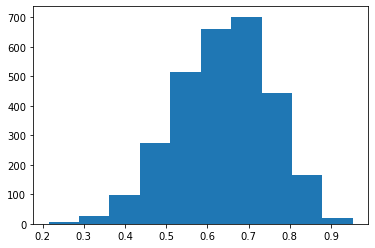

In [48]:
plt.hist(samples)